<a href="https://colab.research.google.com/github/larrygoyeau/Lanit-Tercom/blob/master/GOYEAU_%D0%9F%D0%B5%D1%80%D1%86%D0%B5%D0%BF%D1%82%D1%80%D0%BE%D0%BD_%D0%9B%D0%A8_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Перцептрон
![alt text](https://ldapwiki.com/attach/Perceptron/perceptron.jpg)

На рисунке представлена класическая схема перцептрона.

Как мы узнали из предыдущих статей - модель искусственной нейронной сети была создана по аналогии с мозгом. 
Единица вычисления в нейронно сети - нейрон (узел). Узел получает входные данные (от внешнего источника или от других узлов), а затем вычисляет выходные данные. 
Каждый вход дополняется «весом» (w). Значение весов зависит от важности каждого входа. Нейрон применяет функцию f к входным данным. Функция представляет собой сумму произведений веса на соответствующее значение входа + смещение b. Смещение - это вход равный 1, веса смещение также настраиваются во время обучения.

Компоненты перцептрона: 
- входные значения (1, x1, x2, ... 
, xn);
- веса входных значений (w0, w1, w2, ..., wn);
- значение нейрона - взвешенная сумма входных значений (1×w0 + x1×w1 + x2×w2 + ... + xn×wn);
- функция активации, которая определяет выход нейрона.


В классическом перцептроне в качестве функции активации используется пороговая. Вычисленное значение нейрона сравнивается с заданным порогом в функции активации. Если значение больше порога, то выход = 1, иначе - выход = 0.

На этапе обучения перцептрона предсказанные значения сравниваются с действительными - таким образом вычисляется ошибка обучения.
Значение ошибки далее используется для настройки весов. 


Скорость обучения (learning rate) - это значение отвечает за то, насколько сильно будут сдвигаться веса. 

Наша задачи при обучении нейронной сети - подобрать такие значения весов, при которых ошибка (погрешность между предсказанным и действительным) была минимальна. При использовании слишком большой скорости обучения (learning rate) велика вероятность, что необходимое значение может быть пропущено. При использовании слишком низкого значения - время, затрачиваемое на обучение, будет очень долгим.

Небольшая статья о перцептронах: https://neurohive.io/ru/osnovy-data-science/perseptron-rozenblatta-mashina-kotoraja-smogla-obuchatsja/

Немного про скорость обучения: https://radioprog.ru/post/773






-------------

#Пример 1

##Теперь рассмотрим построение перцептрона на практике. Задача состоит в обучении нейросети выполнять логическую операцию ИЛИ (||).

Для начала подключим библиотеку для работы с массивами и зададим значения для входных данных.

In [ ]:
import numpy as np  # подключаем библиотеку
from numpy import array, dot, random

# X - массив входных значений со всеми возможными вариациями входов для 2ух входных значений
X=np.array([[0,0],
            [1,0],
            [0,1],
            [1,1]])

# Y - массив эталонных значений, то есть значения по индексу соответствуют правильному ответу для дизъюнкции 2ух входных значений из массива Х
Y=np.array([0,1,1,1])

Добавим в массив входных значений смещение (bias).

In [ ]:
# проверим размерность массива
x_shape = X.shape
x_shape

(4, 2)

In [ ]:
# создадим массив со значениями смещений
arr_bias = np.ones((x_shape[0],1), dtype=int)
arr_bias

array([[1],
       [1],
       [1],
       [1]])

In [ ]:
# добавим к массиву входных значений массив смещений
X = np.append(X, arr_bias, axis=1)
X

array([[0, 0, 1],
       [1, 0, 1],
       [0, 1, 1],
       [1, 1, 1]])

In [ ]:
# W - рандомные начальные значения весов для входных значений
W = random.rand(3)
W

array([0.45482198, 0.75445828, 0.3722077 ])

Начнем реализацию алгоритма для построения и обучения перцептрона

In [ ]:
# функция активации
activate = lambda sum: 0 if sum < 0 else 1

# скорость обучения
lr = 2e-1 
# количество итераций обучения
N = 200

for i in range(N):
    # рандомное число от 0 до 3 для определения индекса примера из массива Х
    rndm = random.randint(4)
    # присвоение значения переменной по сгенерированному индексу
    element_x = X[rndm]
    expected = Y[rndm]
    # произведение входного значения (Х) на вес (W)
    result = dot(W, element_x)
    # вычисление ошибки 
    error = expected - activate(result)
    # изменение весов
    for i in range(len(W)):
        W[i] += lr * error * element_x[i]
print(W)

[ 0.45482198  0.75445828 -0.0277923 ]


Тестирование

In [ ]:
# вывод результата тренировки
for element_x in X:
    result = dot(element_x, W)
    print("{}: {} -> {}".format(element_x[:2], result, activate(result)))


[0 0]: -0.02779230119450482 -> 0
[1 0]: 0.4270296753665004 -> 1
[0 1]: 0.7266659745118548 -> 1
[1 1]: 1.1814879510728602 -> 1


#Самостоятельное задание 1.
##Написать аналогичный алгоритм для решения операции логического И (&).

In [ ]:
# решение
# X - массив входных значений со всеми возможными вариациями входов для 2ух входных значений
X=np.array([[0,0],
            [1,0],
            [0,1],
            [1,1]])

# Y - массив эталонных значений, то есть значения по индексу соответствуют правильному ответу для дизъюнкции 2ух входных значений из массива Х
Y=np.array([0,0,0,1])

# проверим размерность массива
x_shape = X.shape

# создадим массив со значениями смещений
arr_bias = np.ones((x_shape[0],1), dtype=int)

# добавим к массиву входных значений массив смещений
X = np.append(X, arr_bias, axis=1)

# W - рандомные начальные значения весов для входных значений
W = random.rand(3)

# функция активации
activate = lambda sum: 0 if sum < 0 else 1

# скорость обучения
lr = 2e-1 
# количество итераций обучения
N = 200

for i in range(N):
    # рандомное число от 0 до 3 для определения индекса примера из массива Х
    rndm = random.randint(4)
    # присвоение значения переменной по сгенерированному индексу
    element_x = X[rndm]
    expected = Y[rndm]
    # произведение входного значения (Х) на вес (W)
    result = dot(W, element_x)
    # вычисление ошибки 
    error = expected - activate(result)
    # изменение весов
    for i in range(len(W)):
        W[i] += lr * error * element_x[i]
print(W)

[ 0.21190477  0.44135311 -0.50087622]


In [ ]:
# вывод результата тренировки
for element_x in X:
    result = dot(element_x, W)
    print("{}: {} -> {}".format(element_x[:2], result, activate(result)))

[0 0]: -0.5008762240957305 -> 0
[1 0]: -0.2889714549989637 -> 0
[0 1]: -0.05952311880624739 -> 0
[1 1]: 0.15238165029051942 -> 1


#Самостоятельное задание 2.
##Написать алгоритм для обучения перцептрона возводить в квадрат.
*то есть на вход будет подаваться число S и на выходе должно получиться Sˆ2.

In [ ]:
# решение

X_max=20
X=np.array([[i] for i in range(X_max)])

# проверим размерность массива
x_shape = X.shape

# создадим массив со значениями смещений
arr_bias = np.ones((x_shape[0],1), dtype=int)

# добавим к массиву входных значений массив смещений
X = np.append(X, arr_bias, axis=1)

Y=np.array([[i**2] for i in range(X_max)])

# W - рандомные начальные значения весов для входных значений
W = random.rand(2)*10

# скорость обучения
lr = 2/10000
# количество итераций обучения
N = 100000

for i in range(N):
    # рандомное число от 0 до X_max для определения индекса примера из массива Х
    rndm = random.randint(X_max)
    # присвоение значения переменной по сгенерированному индексу
    element_x = X[rndm]
    expected = Y[rndm]
    # произведение входного значения (Х) на вес (W)
    result = dot(W, element_x)
    # вычисление ошибки
    error = expected - result
    # изменение весов
    for i in range(len(W)):
        W[i] += lr * error * element_x[i]
print(W)

[ 19.21632828 -55.7819443 ]


In [ ]:
# вывод результата тренировки
Y_predict=[]
for element_x in X:
    Y_predict =Y_predict+[dot(W, element_x)]
    print("{}-> {}".format(element_x[0], Y_predict[-1]))

0-> -55.781944300283435
1-> -36.56561602470839
2-> -17.349287749133353
3-> 1.8670405264416914
4-> 21.08336880201673
5-> 40.299697077591766
6-> 59.51602535316682
7-> 78.73235362874183
8-> 97.94868190431689
9-> 117.16501017989194
10-> 136.38133845546696
11-> 155.597666731042
12-> 174.81399500661706
13-> 194.0303232821921
14-> 213.2466515577671
15-> 232.46297983334216
16-> 251.6793081089172
17-> 270.89563638449226
18-> 290.1119646600673
19-> 309.3282929356423


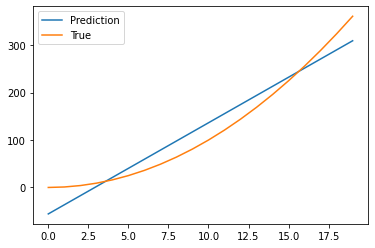

In [ ]:
import matplotlib.pyplot as plt
plt.plot(Y_predict,label='Prediction')
plt.plot(Y,label='True')
plt.legend()

# С функцией активации ReLu

In [ ]:
# решение

X_max=20
X=np.array([[i] for i in range(X_max)])

# проверим размерность массива
x_shape = X.shape

# создадим массив со значениями смещений
arr_bias = np.ones((x_shape[0],1), dtype=int)

# добавим к массиву входных значений массив смещений
X = np.append(X, arr_bias, axis=1)

Y=np.array([[i**2] for i in range(X_max)])

# W - рандомные начальные значения весов для входных значений
W = random.rand(2)*10

# функция активации ReLu
activate = lambda sum: 0 if sum < 0 else sum

# скорость обучения
lr = 2/10000
# количество итераций обучения
N = 100000

for i in range(N):
    # рандомное число от 0 до X_max для определения индекса примера из массива Х
    rndm = random.randint(X_max)
    # присвоение значения переменной по сгенерированному индексу
    element_x = X[rndm]
    expected = Y[rndm]
    # произведение входного значения (Х) на вес (W)
    result = dot(W, element_x)
    # вычисление ошибки
    error = expected - activate(result)
    # изменение весов
    for i in range(len(W)):
        W[i] += lr * error * element_x[i]
print(W)

[ 21.3936537  -95.01057663]


In [ ]:
# вывод результата тренировки
Y_predict=[]
for element_x in X:
    Y_predict =Y_predict+[activate(dot(W, element_x))]
    print("{}-> {}".format(element_x[0], Y_predict[-1]))

0-> 0
1-> 0
2-> 0
3-> 0
4-> 0
5-> 11.957691880999107
6-> 33.35134558272432
7-> 54.744999284449506
8-> 76.13865298617469
9-> 97.53230668789988
10-> 118.92596038962506
11-> 140.31961409135027
12-> 161.7132677930755
13-> 183.10692149480064
14-> 204.50057519652586
15-> 225.89422889825101
16-> 247.28788259997623
17-> 268.68153630170144
18-> 290.0751900034266
19-> 311.4688437051518


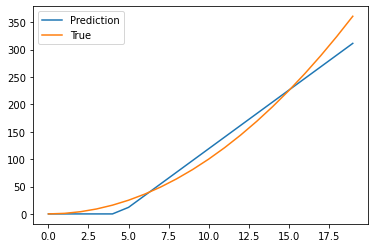

In [ ]:
import matplotlib.pyplot as plt
plt.plot(Y_predict,label='Prediction')
plt.plot(Y,label='True')
plt.legend()